In [2]:
import yaml
import pypsa
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

idx = pd.IndexSlice

from data_path import DATA_PATH as root

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
with open(Path.cwd().parent / 'config' / 'config.yaml') as f:
    colors = yaml.safe_load(f)['plotting']['tech_colors']

root = root / "joint_data"

In [4]:
regions = gpd.read_file(
    root.parent /
    "regions_onshore_elec_s_72.geojson"
    ).set_crs("EPSG:4326")

c:\Users\lukas\miniforge3\envs\basic-pypsa-eur\lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


In [6]:
n = pypsa.Network(
    root.parent / "example_network.nc"
    )

INFO:pypsa.io:Imported network example_network.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [7]:
e = pd.read_csv(root / 'energy.csv', index_col=[0,1], header=list(range(9)))

In [8]:
e.loc[idx['loads']].iloc[:,0].abs().sort_values()

low-temperature heat for industry    5.911000e+07
shipping methanol emissions          1.355037e+08
process emissions                    1.527800e+08
services rural heat                  1.871254e+08
H2 for industry                      1.957800e+08
land transport fuel cell             2.754583e+08
oil emissions                        3.230731e+08
gas for industry                     3.813100e+08
services urban decentral heat        4.795518e+08
residential rural heat               4.956339e+08
shipping methanol                    5.463646e+08
urban central heat                   5.866276e+08
kerosene for aviation                6.122457e+08
solid biomass for industry           7.023900e+08
naphtha for industry                 7.284200e+08
land transport EV                    7.804651e+08
residential urban decentral heat     1.194980e+09
industry electricity                 1.721750e+09
electricity                          1.759174e+09
Name: (72, v1.0, Co2L0-3H-T-H-B-I-solar+p3-dist1, 

In [9]:
load_grouper = {
    "electricity": [
        'electricity',
        'industry electricity',
        'land transport EV',
        ],
    "hydrogen": [
        "H2 for industry",
        "land transport fuel cell"
        ],
    "industry": [
        'naphtha for industry',
        'solid biomass for industry',
        'gas for industry',
        ],
    "transport": [
        'shipping methanol',
        'kerosene for aviation',
        ],
    "heat": [
        "residential urban decentral heat",
        "residential rural heat",
        "low-temperature heat for industry",
        "services rural heat",
        "services urban decentral heat",
        ],
    "district heat": [
        "urban central heat",
        ],
    }

gen_grouper = {
    "solar thermal": [
        "residential rural solar thermal",
        "residential urban decentral solar thermal",
        "services rural solar thermal",
        "services urban decentral solar thermal",
        "urban central solar thermal",
        ], 
    "offshore wind": [
        "offwind-ac",
        "offwind-dc",
    ],
    "onshore wind": ["onwind"],
    "hydro": ["ror"],
    "gas": ["gas"],
    "geothermal heat": ["geothermal heat"],
    "oil": ["oil"],
    "solar": ["solar"],
    "solar rooftop": ["solar rooftop"],
}

nice_colors = {
    key: colors[carriers[0]] for key, carriers in load_grouper.items()
}
nice_gen_colors = {
    key: colors[carriers[0]] for key, carriers in gen_grouper.items()
}

In [10]:
i = idx['loads']

showyear = 2035
models = [
    idx[:,:,:,:,'2020','elec','static','0.3','True'],
    idx[:,:,:,:,str(showyear),'elec','static','0.3','True'],
    idx[:,:,:,:,str(showyear),'dh','static','0.3','True'],
    idx[:,:,:,:,str(showyear),'chp','static','0.3','True'],
]

In [11]:
import yaml
with open(Path.cwd().parent / 'config' / 'config.yaml') as f:
    tech_colors = yaml.safe_load(f)['plotting']['tech_colors']

tech_colors['urban central heat'] = 'darkred'

In [13]:
ncosts = pd.read_csv(
    root /
    'nodal_costs.csv',
    index_col=[0,1,2,3],
    header=list(range(9))
    )
ss = ncosts.loc[:,idx['72', 'v1.0', :, '2050', '2020', 'elec', 'static', '0.3', 'True']]

In [14]:
allnice_carriers = {
    'direct air capture': ['DAC'],
    'hydrogen production and storage': ['SMR CC', 'H2 Electrolysis', 'H2 Store', 'Sabatier'],
    'fuel synthesis': ["Fischer-Tropsch", "mathanolisation"],
    'battery': ['battery', 'battery charger'],
    'hydro': ['ror', 'PHS', 'hydro'],
    'distribution grid': ['electricity distribution grid'],
    'onshore wind': ['onwind'],
    'offshore wind': ['offwind-ac', 'offwind-dc'],
    'gas': [
        'OCGT',
        'urban central gas CHP',
        'residential urban decentral gas boiler',
        ],
    'biomass': [
        'residential urban decentral biomass boiler',
        'urban central solid biomass CHP CC'
        ],
    'other': ['other'],
    'heat pumps': [
        'residential rural ground heat pump',
        'residential urban decentral air heat pump',
        'services rural ground heat pump',
        'services urban decentral air heat pump',
        'urban central air heat pump',
        ],
    'solar': ['solar', 'solar rooftop'],
    'geothermal heat': ['geothermal heat'],
}

allnice_colors = {
    key: tech_colors[carriers[0]] for key, carriers in allnice_carriers.items()
}

In [15]:
def swaplist(a, i, j):
    a[i], a[j] = a[j], a[i]

In [16]:
nice_colors['district heat'] = 'darkred'

In [17]:
from sklearn.preprocessing import MinMaxScaler

egs_cost = pd.read_csv(Path.cwd() / 'egs_cost_data' / 'egs_costs_s_72_2020.csv').set_index('name')['capex_mean']
egs_cost = pd.Series(MinMaxScaler().fit_transform(egs_cost.values.reshape(-1,1)).flatten(), index=egs_cost.index)

regions['egs_cost'] = - egs_cost.values

c:\Users\lukas\miniforge3\envs\basic-pypsa-eur\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\lukas\miniforge3\envs\basic-pypsa-eur\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\lukas\miniforge3\envs\basic-pypsa-eur\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\lukas\AppData\Local\Temp\ipykernel_28436\1978730042.py:262: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_xticklabels(['High', 'Low'], fontsize=9)
c:\Users\lukas\miniforge3\envs\basic-pypsa-eur\lib\site-packa

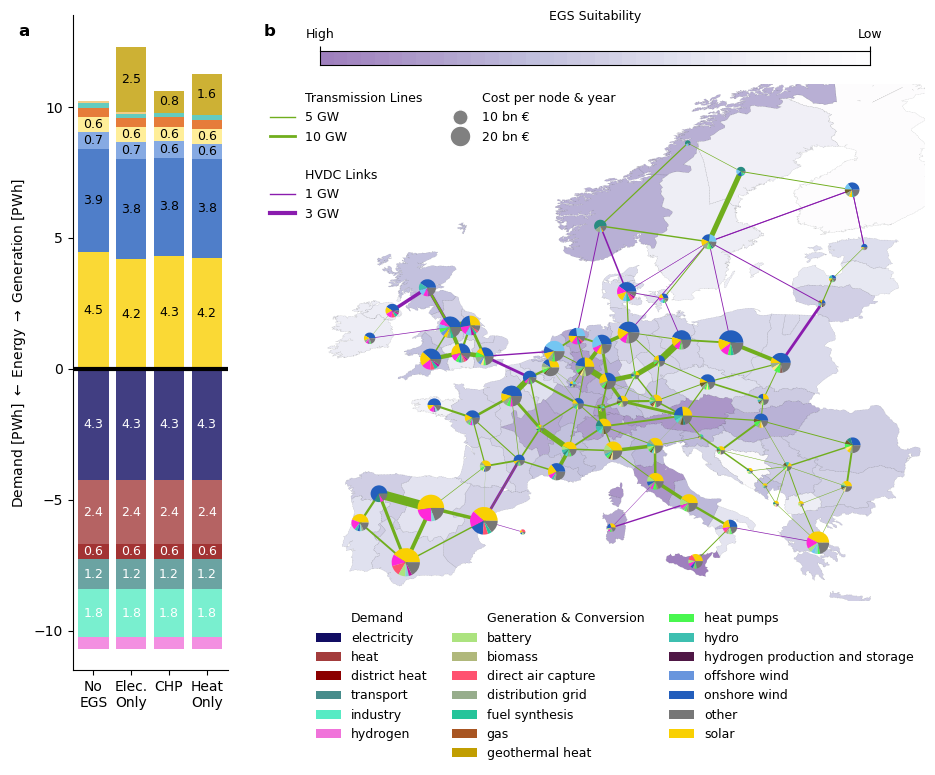

In [18]:
from matplotlib.ticker import LinearLocator


width = 0.8

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,4]}, figsize=(11, 8.5))

included = set()

for j, m in enumerate(models):
    load = e.loc[idx['loads'], m].iloc[:,0].mul(1e-9)
    nice_loads = pd.Series({nice_carr: load.loc[carriers].sum() for nice_carr, carriers in load_grouper.items()})

    if j == 0:
        order = nice_loads.sort_values(ascending=True).index.tolist()
        swaplist(order, order.index('heat') + 1, order.index('district heat'))
    
    nice_loads = nice_loads.loc[order]
    nice_loads_cumulative = nice_loads.cumsum()

    for nice_carr in order:

        value = nice_loads.loc[nice_carr]
        ceil = nice_loads_cumulative.loc[nice_carr]
        axs[0].bar(
            j,
            -value,
            color=nice_colors[nice_carr],
            bottom=ceil,
            width=width,
            alpha=0.8,
            )
        
        if abs(value) > 0.5:
            axs[0].text(
                j,
                ceil - value/2,
                f"{abs(value):.1f}",
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                # fontweight='bold',
                )

    gen = e.loc[idx['generators'], m].iloc[:,0].mul(1e-9)
    nice_gens = pd.Series({nice_carr: gen.loc[carriers].sum() for nice_carr, carriers in gen_grouper.items()})

    if j == 0:
        gen_order = nice_gens.sort_values(ascending=False).index

    nice_gens = nice_gens.loc[gen_order]
    nice_gens_cumulative = nice_gens.cumsum()

    for nice_carr in gen_order:

        value = nice_gens.loc[nice_carr]
        ceil = nice_gens_cumulative.loc[nice_carr]
        axs[0].bar(
            j,
            -value,
            color=nice_gen_colors[nice_carr],
            bottom=ceil,
            width=width,
            alpha=0.8,
            )

        if abs(value) > 0.5:
            axs[0].text(
                j,
                ceil - value/2,
                f"{abs(value):.1f}",
                ha='center',
                va='center',
                color='k',
                fontsize=9,
                )


axs[0].set_xlim(-width/2 - 0.15, len(models) - 1 + width/2 + 0.15)
axs[0].set_ylim(-11.5, 13.5)
axs[0].plot([-width/2 - 0.15, len(models) - 1 + width/2 + 0.15], [0, 0], color='black', lw=3)
axs[0].set_ylabel(r"Demand [PWh] $\leftarrow$ Energy $\rightarrow$ Generation [PWh]")

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)

regions.plot(
    ax=axs[1],
    # color="whitesmoke",
    cmap="Purples",
    column='egs_cost',
    edgecolor="k",
    linewidth=0.2,
    alpha=0.5,
    label="name",
    zorder=0,
    linestyle=":",
    )

onegw_linkwidth = 1

for line in n.links.loc[n.links.carrier == 'DC'].iterrows():
    axs[1].plot(
        [n.buses.loc[line[1].bus0].x, n.buses.loc[line[1].bus1].x],
        [n.buses.loc[line[1].bus0].y, n.buses.loc[line[1].bus1].y],
        color='#8a1cae',
        lw=line[1].p_nom / 1000 * onegw_linkwidth,
        zorder=1,
        )

onegw_linewidth = 0.2

for line in n.lines.iterrows():
    axs[1].plot(
        [n.buses.loc[line[1].bus0].x, n.buses.loc[line[1].bus1].x],
        [n.buses.loc[line[1].bus0].y, n.buses.loc[line[1].bus1].y],
        color='#70ae1d',
        lw=line[1].s_nom/1000*onegw_linewidth,
        zorder=1,
        )

shown_carriers = pd.Index([])

for i, bus in enumerate(ss.index.get_level_values(2).unique()):

    if (
        isinstance(bus, float) or
        'EU' in bus or
        bus in ['gas for', 'process', 'solid']
    ):
        continue

    buss = (
        ss
        .loc[idx[:,:,bus,:]]
        .groupby(level=2).sum()
        .iloc[:,0]
        .sort_values(ascending=False)
    )

    buss.name = 'costs'

    share_threshold = 0.035
    total = buss.sum()
    show = buss.loc[buss > total * share_threshold]
    show.loc['other'] = buss.loc[buss <= total * share_threshold].sum()

    shown_carriers = shown_carriers.union(show.index)
    
    onebn_area = 0.5

    radius = np.sqrt(show.sum()*1e-9) / np.pi * onebn_area

    show /= total

    x, y = n.buses.loc[bus].x, n.buses.loc[bus].y

    axs[1].pie(
        show,
        radius=radius,
        colors=[tech_colors.get(c, 'grey') for c in show.index],
        center=(x, y),
    )


axs[0].spines['bottom'].set_visible(True)
axs[0].set_xticks(
    list(range(4)),
    [
        "No\nEGS",
        "Elec.\nOnly",
        "CHP",
        "Heat\nOnly",
    ],
    )

ss.loc[idx[:,:,'GB0 0','residential urban decentral gas boiler']]

axs[1].set_aspect('equal')
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[1].set_xlim(-12, 30)
axs[1].set_ylim(35, 70)

trans_labels = [
    'Transmission Lines', '5 GW', '10 GW', '', 'HVDC Links', '1 GW', '3 GW',
    'Cost per node & year', '10 bn €', '20 bn €', '', '', '',
    ]

trans_handles = [
    Line2D([0], [0], color='w'),
    Line2D([0], [0], color='#70ae1d', lw=onegw_linewidth*5),
    Line2D([0], [0], color='#70ae1d', lw=onegw_linewidth*10),
    Line2D([0], [0], color='w'),
    Line2D([0], [0], color='w'),
    Line2D([0], [0], color='#8a1cae', lw=onegw_linkwidth*1),
    Line2D([0], [0], color='#8a1cae', lw=onegw_linkwidth*3),
    Line2D([0], [0], color='w'),
    Line2D([0], [0], color='w', marker='o', markersize=11, markerfacecolor='grey'),
    Line2D([0], [0], color='w', marker='o', markersize=15, markerfacecolor='grey'),
    Line2D([0], [0], color='w'),
    Line2D([0], [0], color='w'),
    Line2D([0], [0], color='w'),
    ]


load_labels = list(nice_loads.index)
load_handles = [Patch(facecolor=nice_colors[l], label=l) for l in load_labels]

gen_labels = sorted(list(allnice_carriers.keys()))
gen_handles = [Patch(facecolor=allnice_colors[l], label=l) for l in gen_labels]

handles = [Line2D([0], [0], color='w')] + load_handles + 2*[Line2D([0], [0], color='w')] + gen_handles
labels = ["Demand"] + load_labels + ["", "Generation & Conversion"] + gen_labels

axs[1].legend(
    handles,
    labels,
    bbox_to_anchor=(1, -0.),
    frameon=False,
    fontsize=9,
    ncol=3,
    )

axs[0].legend(
    trans_handles,
    trans_labels,
    bbox_to_anchor=(1.2, 0.9),
    ncol=2,
    frameon=False,
    fontsize=9,
)

axs[0].text(
    -2,
    12.7,
    "a",
    fontsize=12,
    fontweight='bold'
    )
axs[0].text(
    4.5,
    12.7,
    "b",
    fontsize=12,
    fontweight='bold'
    )

cax = fig.add_axes([0.35, 0.82, 0.5, 0.02])
cax.set_yticks([])
cdata = np.arange(40, 0, -1).reshape(1, 40)

im = cax.imshow(cdata, cmap="Purples", alpha=0.5)
cax.set_title("EGS Suitability", fontsize=9)

cax.xaxis.set_major_locator(LinearLocator(numticks=2))
cax.set_xticklabels(['High', 'Low'], fontsize=9)
cax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
cax.xaxis.set_label_coords(0.5, -10)

plt.savefig("intro_model_overview.pdf")
plt.show()